In [3]:
import pandas as pd
import numpy as np
from tkinter import *
from tkinter import filedialog
import os
from matplotlib import pyplot as plt
import xml.etree.ElementTree
import seaborn as sns
import _2D_Utils
import matplotlib
from scipy.signal import *

# tkinter setup
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
%gui tk

# Camera constants
num_pixels = 1024
nm_per_pixel = 0.125
nm_in_half = (num_pixels/2) * nm_per_pixel

In [4]:
# NOTE! This is for the newer versions of the Labview 2D-LIF program!!!
# For older files, the ordering of .xml file is different; indices need to be changed accordingly.
# Read xml file
xml_file, data_file = _2D_Utils.get_files()
xml_tree = _2D_Utils.get_tree(xml_file)
xml_root = xml_tree.getroot()

# Get scan settings
scan_start, scan_stop, scan_step, nsteps, offset = _2D_Utils.get_params(xml_root)

# Calculate graph center for y-axis, along with min and max (in nm)
fluor_center = _2D_Utils.get_center(scan_start, offset)
fluor_min = fluor_center + nm_in_half
fluor_max = fluor_center - nm_in_half

LIF_pts = np.linspace(scan_start, scan_stop, nsteps)
DF_pts = np.linspace(fluor_min, fluor_max, num_pixels)

# Load data from data_file
data_transposed, data_medfilt = _2D_Utils.read_data(data_file)

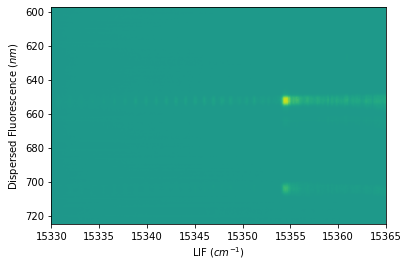

In [5]:
_2D_Utils.show_graph(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max)

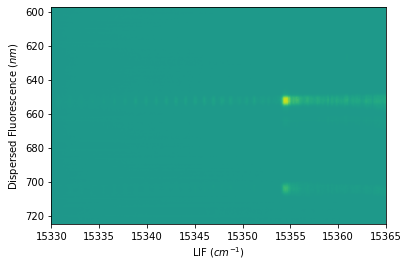

In [6]:
_2D_Utils.save_image(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max, data_file)

Text(0, 0.5, 'Intensity')

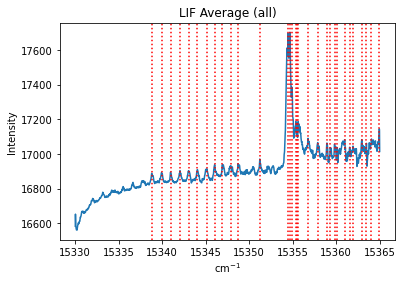

In [7]:
lif = _2D_Utils.LIF_slice(data_medfilt, DF_pts)

lif_peaks = _2D_Utils.get_2d_peaks(lif, 50, 2)

plt.plot(LIF_pts, lif)
for peak in lif_peaks[0]:
    plt.axvline(x=LIF_pts[peak], color='r', linestyle=':')
    
plt.title("LIF Average (all)")
plt.xlabel(r"cm$^{-1}$")
plt.ylabel("Intensity")

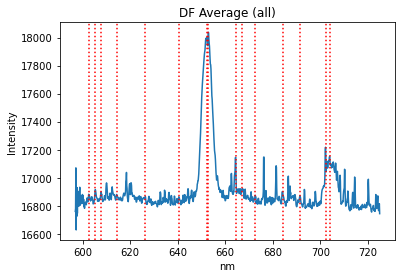

In [8]:
desired_DF_prominence = 40
desired_DF_width = 5
# Change the above lines to determine peak selection sensitivity for DF slices

desired_LIF_prominence = 1000
desired_LIF_width = 10
# Change the above lines to determine peak selection sensitivity for LIF slices

DF_slice_min = None
DF_slice_max = None
# Change the above lines to limit area of selection for DF slices; None will take average over all points

df = _2D_Utils.DF_slice(data_medfilt, LIF_pts, DF_slice_min, DF_slice_max)

df_peaks, _ = _2D_Utils.get_2d_peaks(np.flip(df), desired_DF_prominence, desired_DF_width)

plt.plot(DF_pts, np.flip(df))
for peak in df_peaks:
    plt.axvline(x=DF_pts[peak], color='r', linestyle=':')
    
plt.title("DF Average (all)")
plt.xlabel("nm")
plt.ylabel("Intensity")

slices = _2D_Utils.auto_slice(data_medfilt, DF_pts, LIF_pts, DF_min=DF_slice_min, DF_max=DF_slice_max, DF_prominence=desired_DF_prominence, LIF_prominence=desired_LIF_prominence, DF_width=desired_DF_width, LIF_width=desired_LIF_width)

In [9]:
print(f'Number of slices available: {len(slices)}')

Number of slices available: 15


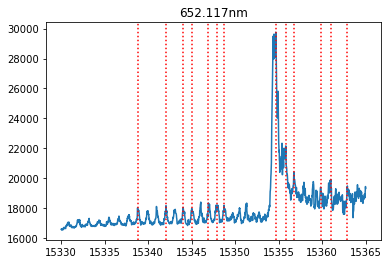

In [10]:
desired_peak = 6 # Change this to select which slice to plot
peak_lines = True # Controls whether to draw vertical peak lines

plt.plot(LIF_pts, slices[desired_peak][1])
if peak_lines:
    for peak in slices[desired_peak][2][0]:
        plt.axvline(x=LIF_pts[peak], color='r', linestyle=':')
plt.title(f'{round(DF_pts[-slices[desired_peak][0]], 3)}nm')

#plt.xlim(15290, 15320)
plt.savefig(f"{os.path.dirname(data_file)}/{scan_start}-{scan_stop}_{round(DF_pts[-slices[desired_peak][0]], 3)}nm_{scan_step}cm.png", dpi=1200)

In [11]:
for peak in slices[desired_peak][2][0]:
    print(f"{LIF_pts[peak]}")

15338.78
15342.04
15344.02
15345.0
15346.92
15347.92
15348.72
15354.66
15355.82
15356.74
15359.82
15360.98
15362.9
